In [ ]:
from sklearn.datasets import load_digits
import pandas as pd
import matplotlib.pyplot as plt


<Figure size 640x480 with 0 Axes>

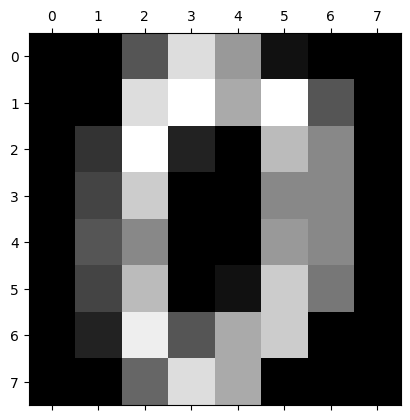

In [ ]:
#Visulization of the digit's image
plt.gray()
digits = load_digits()
plt.matshow(digits.images[0])

In [ ]:
dir(digits)
#data contatins the 8 by 8 matrix size of the image info in form of array values
#images contains the handwritten images
#target contains the correct digit for that image

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [ ]:
X_train = digits.data
X_train.shape

(1797, 64)

In [ ]:
y_train = digits.target
y_train.shape

(1797,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, train_size=0.2)


Using Logistic Regression to test the accuracy of the model

In [ ]:
from sklearn.linear_model import LogisticRegression
model_1 = LogisticRegression()

model_1.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
model_1.score(X_test, y_test)

# The accuracy using Logistic Regression is 93.94%

0.933240611961057

Let us use other approach to find the accuracy and see it performs better.

Using RBF kernel



In [ ]:
from sklearn.svm import SVC
rbf_model = SVC(kernel="rbf")

In [ ]:
rbf_model.fit(X_train, y_train)


SVC()

In [ ]:
rbf_model.score(X_test, y_test)

0.9513212795549374

Using Linear Kernel

In [ ]:
linear_model = SVC(kernel="linear")
linear_model.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
linear_model.score(X_test, y_test)

0.9541029207232267

In most cases, linear model performs better. However, we should understand test and find out which model works with the chosen dataset.

Also, lets make a confusion matrix to visulize where our model is not able to predict properly.

KFold Cross Validation

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [ ]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]):
  print(train_index, test_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


In [ ]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [ ]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=3)

scores_logistic = []
scores_svm = []
scores_rf = []

for train_index, test_index in folds.split(digits.data,digits.target):
    X_train, X_test, y_train, y_test = digits.data[train_index], digits.data[test_index], \
                                       digits.target[train_index], digits.target[test_index]
    scores_logistic.append(get_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X_train, X_test, y_train, y_test))
    scores_svm.append(get_score(SVC(gamma='auto'), X_train, X_test, y_train, y_test))

In [ ]:
scores_logistic

[0.8948247078464107, 0.9532554257095158, 0.9098497495826378]

cross validation score function

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), digits.data, digits.target,cv=3)

array([0.89482471, 0.95325543, 0.90984975])

In [ ]:
cross_val_score(SVC(gamma='auto'), digits.data, digits.target,cv=3)

array([0.38063439, 0.41068447, 0.51252087])